In [1]:
#%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf #Tensorflow handles the Training and Testing
from tensorflow import keras #Keras handles the importing of Data
import numpy as np #NumPy does funny math good
import matplotlib.pyplot as plt #MatPlotLib visualizes data
from PIL import Image #Image processing Library

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz") # loads MNIST Digits dataset and splits it into training and testing data

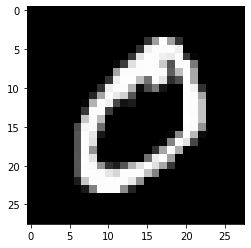

In [3]:
#Uses MatPlot to show the first digit
plt.figure()
plt.imshow(train_images[1], cmap = "gray")
plt.show()

In [4]:
#Data Formatting: Converts the 0-255 int range of each pixel to a 0-1 float  
train_images = train_images / 255.0
test_images = test_images / 255.0
#Note: You can't use /= for some reason. Something about datatype mismatch

In [5]:
#Creating the Network: Sets up the NN Structure, connection types, and activation functions
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Sets input layer equal to flattened 28x28       
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),                     
])

In [6]:
#Compile the Model: Sets up the models loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [7]:
#Training the model: feeds in training images and labels to create preliminary connections
model.fit(train_images, train_labels, epochs=7) 
# Note: Epochs are the number of thimes the data is fed through the system
#       More epochs are not necessarily good as you risk overfitting a model which is where the model is 
#       more or less remembering the data rather than developing useful prediction about it


Epoch 1/7
1875/1875 [==============================] - 2s 834us/step - loss: 0.2652 - accuracy: 0.9249
Epoch 2/7
1875/1875 [==============================] - 1s 723us/step - loss: 0.1167 - accuracy: 0.9659
Epoch 3/7
1875/1875 [==============================] - 1s 718us/step - loss: 0.0801 - accuracy: 0.9757
Epoch 4/7
1875/1875 [==============================] - 1s 722us/step - loss: 0.0594 - accuracy: 0.9815
Epoch 5/7
1875/1875 [==============================] - 1s 727us/step - loss: 0.0470 - accuracy: 0.9854
Epoch 6/7
1875/1875 [==============================] - 2s 900us/step - loss: 0.0367 - accuracy: 0.9883
Epoch 7/7
1875/1875 [==============================] - 1s 786us/step - loss: 0.0305 - accuracy: 0.9905


In [8]:
#Testing the model: uses teesting images and labels to verify accuracy of training
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 572us/step - loss: 0.0772 - accuracy: 0.9766
Test accuracy: 0.9765999913215637


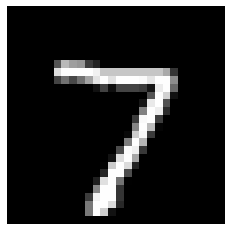

The Neural Network thinks its a 7 with a 99.99088048934937% confidence


In [9]:
def getNum():
  while True:
    num = input("Pick a number from 0 to "+ str(test_images.shape[0])+ ": ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= test_images.shape[0]:
        return num
    else:
      print("Try again...")
def display(num):
  plt.figure()
  plt.imshow(test_images[num], cmap="gray")
  plt.axis('off')
  plt.show()

num = 0 #getNum() #commented out for testing purposes
display(num)
prediction = model.predict(test_images)
guess = np.argmax(prediction[num])
print("The Neural Network thinks its a ", guess, " with a ", prediction[num, guess]*100,"% confidence", sep="" )

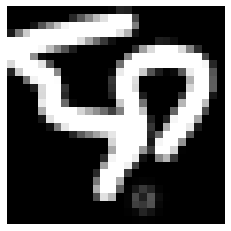

The Neural Network thinks its a 6 with a 100.0% confidence


In [14]:
custom = np.asarray(Image.open("number.png").convert("L")) / 255 # imports image and converts to grayscale pixels 0-1
custom = 1 - custom #inverts image. Black ink on White background -> White ink on Black Background. Reason: MNIST Dataset has original data white on black BG
set = np.expand_dims(custom, axis=0) #creates arbitrary dataset containg just the custom image

plt.figure()
plt.imshow(set[0], cmap = "gray")
plt.axis("off")
plt.show()

prediction = model.predict(set) #feeds "dataset" into model
guess = np.argmax(prediction[0]) #retrieves guess
print("The Neural Network thinks its a ", guess, " with a ", prediction[0, guess]*100,"% confidence", sep="" )
